In [8]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [9]:
# Import data
cod_dane= pd.read_csv('data/cod_dane.csv')

datos_col = pd.read_csv('data/homicidios_policia.csv',
                       sep=';',
                       parse_dates=["FECHA HECHO"]
                       )

c:\Users\mjsoto\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '13/01/2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\mjsoto\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '14/01/2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\mjsoto\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '15/01/2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\mjsoto\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '16/01/2010' in DD/MM/YYYY format. Provide format or sp

In [10]:
# Rename columns names
datos_col.columns = ['departamento','municipio','codigo','arma','fecha','genero', 'edad_grupo', 'cantidad']
# Create a copy to avoid affect the original df
df = datos_col.copy()

In [12]:
# Select only values related to the 3 selected departments
keep_values =  [
        "ANTIOQUIA",
        "VALLE",
        "CUNDINAMARCA",
]

df = df[df["departamento"].isin(keep_values)]

In [13]:
# Delete special characters
cod_dane['Código Centro Poblado'] = cod_dane['Código Centro Poblado'].apply(lambda x: x.replace(',',''))
cod_dane['Código Centro Poblado'] = cod_dane['Código Centro Poblado'].astype(int)

In [14]:
# Replace and delete na values from age
df['edad_grupo'].replace(' ', np.nan, inplace=True)
df = df.dropna()

In [15]:
# Dict to replace several weapon names
dict_values =  {
"ARMA BLANCA / CORTOPUNZANTE":"ARMA BLANCA",
"ARMA DE FUEGO":"ARMA DE FUEGO",
"CORTANTES":"ARMA BLANCA",
"PUNZANTES":"ARMA BLANCA",
"CONTUNDENTES":"OTRAS ARMAS",
"ARTEFACTO EXPLOSIVO/CARGA DINAMITA":"OTRAS ARMAS",
"MINA ANTIPERSONA":"OTRAS ARMAS",
"CUERDA/SOGA/CADENA":"OTRAS ARMAS",
"COMBUSTIBLE":"OTRAS ARMAS",
"BOLSA PLASTICA":"OTRAS ARMAS",
"MOTO BOMBA":"OTRAS ARMAS",
"GRANADA DE MANO":"OTRAS ARMAS",
"PAQUETE BOMBA":"OTRAS ARMAS",
"SUSTANCIAS TOXICAS":"OTRAS ARMAS",
"SIN EMPLEO DE ARMAS":"OTRAS ARMAS",
"JERINGA":"OTRAS ARMAS",
"CARRO BOMBA":"OTRAS ARMAS",
"NO REPORTADO":"OTRAS ARMAS",
"PERSONA BOMBA":"OTRAS ARMAS",
"CINTAS/CINTURON":"OTRAS ARMAS",
"ESCOPOLAMINA":"OTRAS ARMAS",
"ALMOHADA":"OTRAS ARMAS",
"CILINDRO BOMBA":"OTRAS ARMAS",
"ARTEFACTO INCENDIARIO":"OTRAS ARMAS",
"VENENO":"OTRAS ARMAS",
"ROCKET":"OTRAS ARMAS",
"QUIMICOS":"OTRAS ARMAS",
"OLLA BOMBA":"OTRAS ARMAS",
"GASES":"OTRAS ARMAS",
"NO REPORTADA":"OTRAS ARMAS",
"GRANADA DE MORTERO":"OTRAS ARMAS",
"CASA BOMBA":"OTRAS ARMAS",
"MEDICAMENTOS":"OTRAS ARMAS",
"ACIDO":"OTRAS ARMAS",
"POLVORA(FUEGOS PIROTECNICOS)":"OTRAS ARMAS",
"PRENDAS DE VESTIR":"OTRAS ARMAS",
"LIQUIDOS":"OTRAS ARMAS"
}

df = df.replace({"arma": dict_values})
df['arma'].replace('ARMA BLANCA / CORTOPUNZANTE', 'ARMA BLANCA', inplace=True)

In [16]:
# Create year column
df['ano'] = df['fecha'].dt.year
# Create dayname column as Monday, Tuesday...
df["dia"] = df["fecha"].dt.day_name()

In [18]:
# Reorder columns index
df = df.reindex(columns=['fecha','ano','dia','departamento','municipio','codigo', 'arma', 'genero', 'edad_grupo', 'cantidad'])

In [19]:
# Df merged with code Dane information to georeference homicides
df_hom = pd.merge(df, cod_dane[['Código Centro Poblado','Tipo Centro Poblado', 'Longitud', 'Latitud']],
                  left_on='codigo', 
                  right_on='Código Centro Poblado', 
                  how='left')

df_hom = df_hom.drop(columns=["Código Centro Poblado"])

,fecha,ano,dia,departamento,municipio,codigo,arma,genero,edad_grupo,cantidad,Tipo Centro Poblado,Longitud,Latitud
0,2010-01-01,2010,Friday,ANTIOQUIA,AMAGÁ,5030000,ARMA BLANCA,MASCULINO,ADULTOS,1,CABECERA MUNICIPAL (CM),-75.701948,6.038808
1,2010-01-01,2010,Friday,ANTIOQUIA,MEDELLÍN (CT),5001000,ARMA BLANCA,MASCULINO,ADULTOS,1,CABECERA MUNICIPAL (CM),-75.576002,6.248586
2,2010-01-01,2010,Friday,ANTIOQUIA,RIONEGRO,5615000,ARMA BLANCA,MASCULINO,ADULTOS,1,CABECERA MUNICIPAL (CM),-75.376767,6.147225


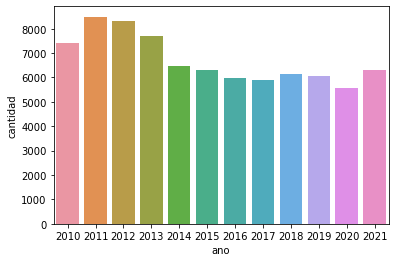

In [20]:
# Group data to plot by year
yearly_homicidies = df.groupby("ano")['cantidad'].sum()
yearly_homicidies = yearly_homicidies.to_frame().reset_index()

sns.barplot(x = 'ano',
            y = 'cantidad',
            data = yearly_homicidies)
plt.show()


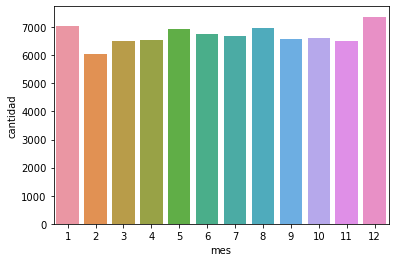

In [21]:
# Group data to plot by month
df['mes'] = df['fecha'].dt.month
monthly_homicidies = df.groupby("mes")['cantidad'].sum()
monthly_homicidies = monthly_homicidies.to_frame().reset_index()

sns.barplot(x = 'mes',
            y = 'cantidad',
            data = monthly_homicidies)
plt.show()

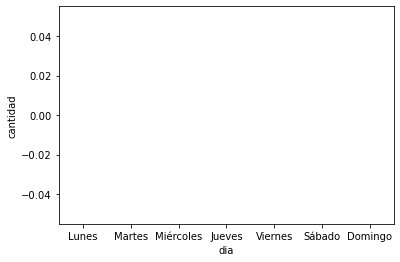

In [22]:
# Group data to plot by day
daily_homicidies = df.groupby("dia")['cantidad'].sum()
daily_homicidies = daily_homicidies.to_frame().reset_index()

dias_ordenados = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
daily_homicidies.dia = pd.Categorical(daily_homicidies.dia, dias_ordenados)

sns.barplot(x = 'dia',
            y = 'cantidad',
            data = daily_homicidies)
plt.show()

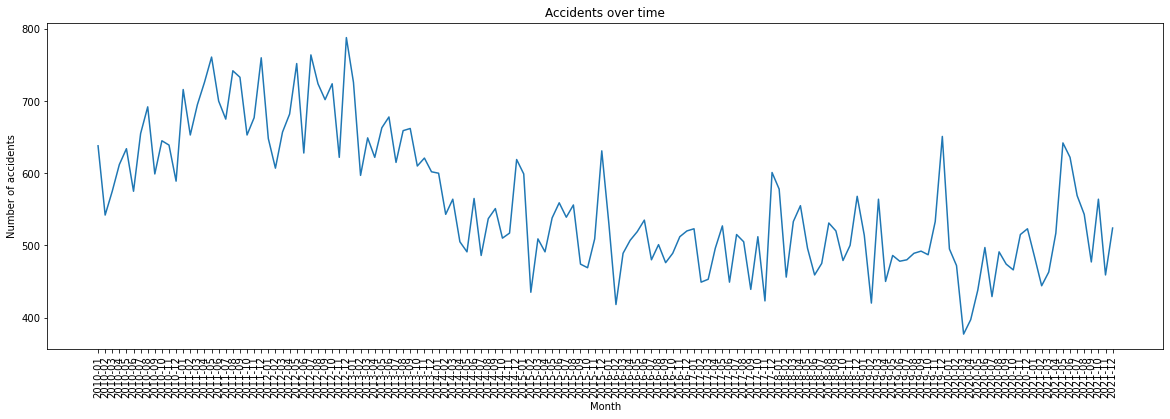

In [23]:
# Check data by months and years at the same time
df['año_mes'] = df['fecha'].dt.to_period('M')
monthly_homicidies = df.groupby("año_mes")['cantidad'].sum()
monthly_homicidies = monthly_homicidies.to_frame().reset_index()

# Linespace
x = np.arange(0,len(monthly_homicidies),1)
fig, ax = plt.subplots(figsize=(20,6))

ax.plot(x,monthly_homicidies['cantidad'])
ax.set_xticks(x)
ax.set_xticklabels(monthly_homicidies['año_mes'])
plt.xticks(rotation=90)

plt.xlabel("Month")
plt.ylabel("Number of accidents")
plt.title("Accidents over time")
plt.show()

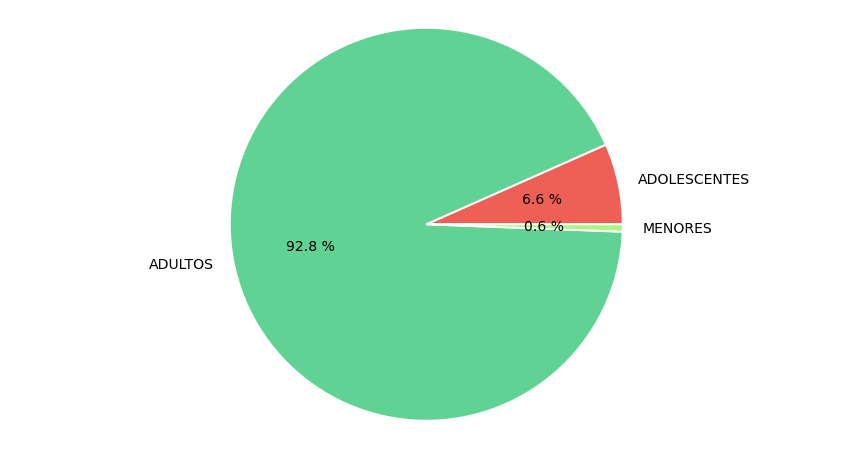

In [25]:
# Group data to plot by age groups
age_homicidies = df.groupby("edad_grupo")['cantidad'].sum()
age_homicidies = age_homicidies.to_frame().reset_index()

colores = ["#EE6055","#60D394","#AAF683"]
desfase = (0.1, 0, 0)
plt.figure(figsize=(15, 8)) 
plt.pie(age_homicidies['cantidad'], 
        labels=age_homicidies['edad_grupo'], 
        autopct="%0.1f %%",
        colors=colores, 
        wedgeprops={'linewidth': 2.0, 'edgecolor': 'white'},
        textprops={'fontsize': 14})
plt.axis("equal")
plt.show()

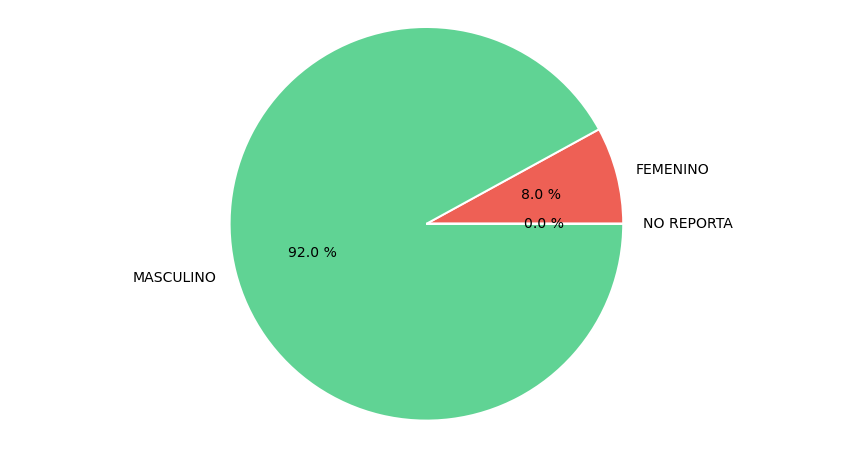

In [26]:
# Group data to plot by genre
sex_homicidies = df.groupby("genero")['cantidad'].sum()
sex_homicidies = sex_homicidies.to_frame().reset_index()

colores = ["#EE6055","#60D394","#AAF683"]
desfase = (0.1, 0, 0)
plt.figure(figsize=(15, 8)) 
plt.pie(sex_homicidies['cantidad'], 
        labels=sex_homicidies['genero'],
        autopct="%0.1f %%",
        colors=colores,
        wedgeprops={'linewidth': 2.0, 'edgecolor': 'white'},
        textprops={'fontsize': 14})
plt.axis("equal")
plt.show()

<AxesSubplot:xlabel='departamento', ylabel='porcentaje'>

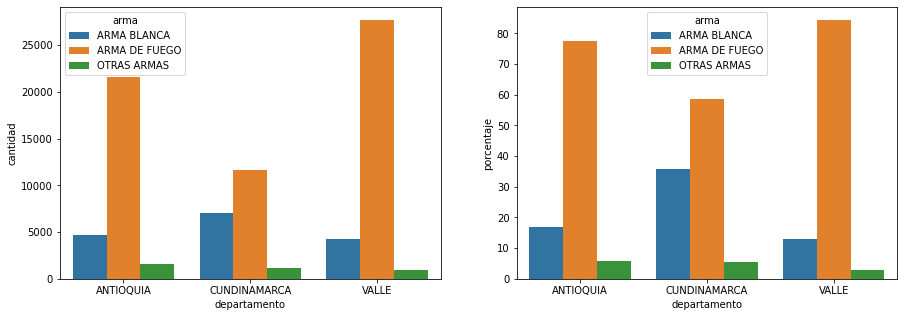

In [27]:
#Number and percentage of homicides by department and weapon
hom_dpto_arma = df.groupby(["departamento","arma"])['cantidad'].sum() # Obtain total
hom_dpto_arma2 = hom_dpto_arma.groupby("departamento").apply(lambda x: 100 * x / float(x.sum())) # Obtain percentage

# Merge news dfs to plot department, total and percentage of homicides by type of weapon
merged_inner = pd.merge(left=hom_dpto_arma,right=hom_dpto_arma2, left_on=['departamento','arma'], right_on=['departamento','arma'])
merged_inner = merged_inner.reset_index()
merged_inner.columns = ["departamento","arma","cantidad","porcentaje"]


fig, (ax0,ax1) = plt.subplots (1, 2, figsize=(15, 5))

sns.barplot(
    data=merged_inner, 
    x="departamento",
    y="cantidad", 
    hue="arma",
    ax=ax0)

sns.barplot(
    data=merged_inner, 
    x="departamento",
    y="porcentaje", 
    hue="arma",
    ax=ax1)

<AxesSubplot:xlabel='departamento', ylabel='porcentaje'>

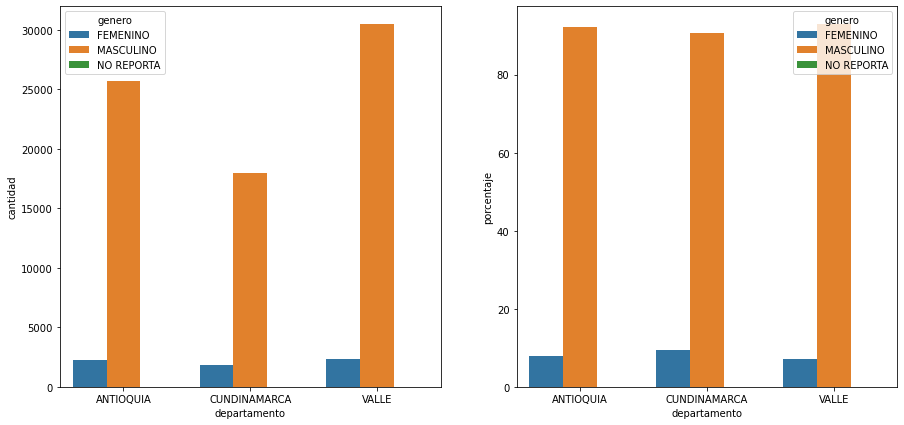

In [28]:
# Number and percentage of homicides by department and gender
hom_dpto_gen = df.groupby(["departamento","genero"])['cantidad'].sum() # Obtain total
hom_dpto_gen2 = hom_dpto_gen.groupby("departamento").apply(lambda x: 100 * x / float(x.sum())) # Obtain percentage

# Merge news dfs to plot department, total and percentage of homicides by gender
merged_inner = pd.merge(left=hom_dpto_gen,right=hom_dpto_gen2, left_on=['departamento','genero'], right_on=['departamento','genero'])
merged_inner = merged_inner.reset_index()
merged_inner.columns = ["departamento","genero","cantidad","porcentaje"]
merged_inner

fig, (ax0,ax1) = plt.subplots (1, 2, figsize=(15, 7))

sns.barplot(
    data=merged_inner, 
    x="departamento",
    y="cantidad", 
    hue="genero",
    ax=ax0)

sns.barplot(
    data=merged_inner, 
    x="departamento",
    y="porcentaje", 
    hue="genero",
    ax=ax1)

<AxesSubplot:xlabel='departamento', ylabel='porcentaje'>

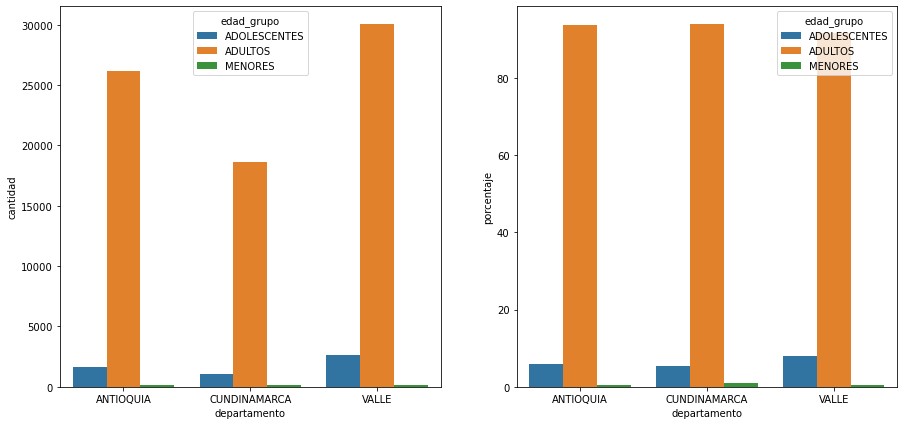

In [29]:
# Number and percentage of homicides by department and age group
hom_dpto_edad = df.groupby(["departamento","edad_grupo"])['cantidad'].sum()
hom_dpto_edad2 = hom_dpto_edad.groupby("departamento").apply(lambda x: 100 * x / float(x.sum()))

merged_inner = pd.merge(left=hom_dpto_edad,right=hom_dpto_edad2, left_on=['departamento','edad_grupo'], right_on=['departamento','edad_grupo'])
merged_inner = merged_inner.reset_index()
merged_inner.columns = ["departamento","edad_grupo","cantidad","porcentaje"]
merged_inner

fig, (ax0,ax1) = plt.subplots (1, 2, figsize=(15, 7))

sns.barplot(
    data=merged_inner, 
    x="departamento",
    y="cantidad", 
    hue="edad_grupo",
    ax=ax0)

sns.barplot(
    data=merged_inner, 
    x="departamento",
    y="porcentaje", 
    hue="edad_grupo",
    ax=ax1)

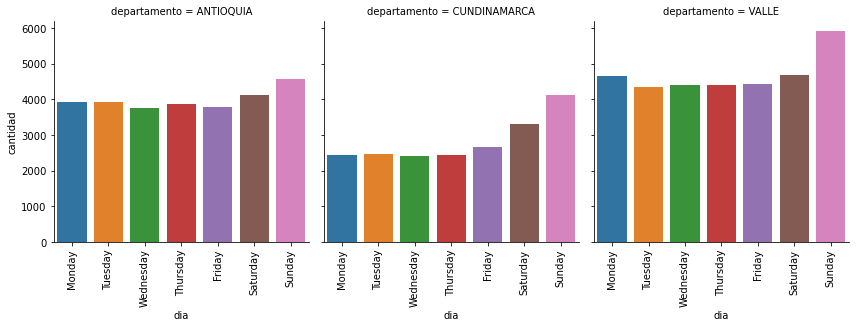

In [30]:
# Plot homicides by department and day
hom_dpto_dia = df.groupby(["dia","departamento"])['cantidad'].sum()
hom_dpto_dia = hom_dpto_dia.reset_index()

graph3 = sns.catplot(
    data=hom_dpto_dia, 
    kind="bar",
    x="dia",
    y="cantidad", 
    col="departamento",
    height=4,
    order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
)

graph3.set_xticklabels(rotation=90)

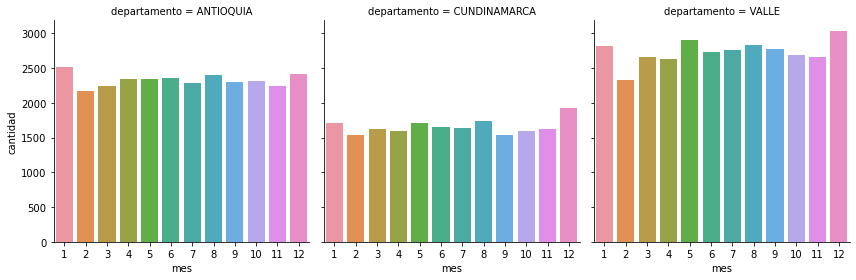

In [31]:
# Plot homicides by department and month
hom_dpto_mes = df.groupby(["mes","departamento"])['cantidad'].sum()
hom_dpto_mes = hom_dpto_mes.reset_index()
hom_dpto_mes

graph4 = sns.catplot(
    data=hom_dpto_mes, 
    kind="bar",
    x="mes",
    y="cantidad", 
    col="departamento",
    height=4,
)


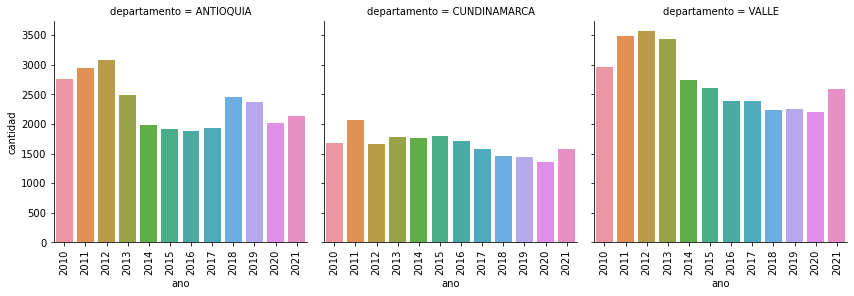

In [32]:
# Plot homicides by department and year
hom_dpto_ano = df.groupby(["ano","departamento"])['cantidad'].sum()
hom_dpto_ano = hom_dpto_ano.reset_index()
hom_dpto_ano

graph5 = sns.catplot(
    data=hom_dpto_ano, 
    kind="bar",
    x="ano",
    y="cantidad", 
    col="departamento",
    height=4,
)

graph5.set_xticklabels(rotation=90)


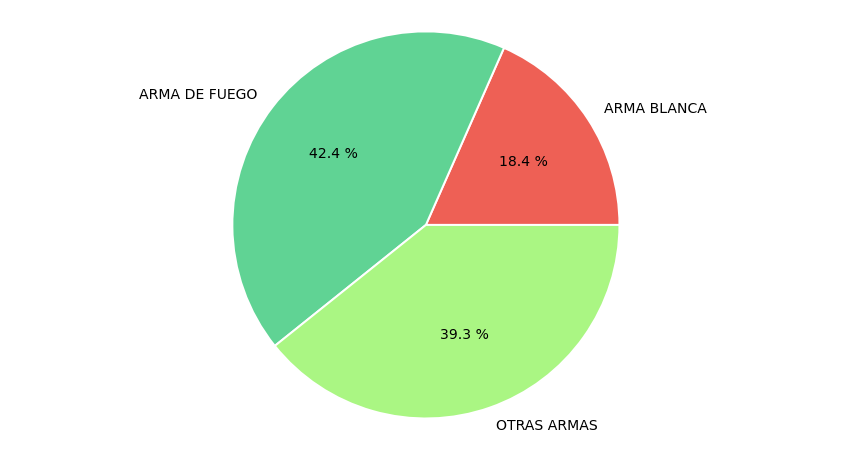

In [33]:
# Plot homicides by type of weapon and minors
df_temp = df[df['edad_grupo'] == "MENORES"]
hom = df_temp.groupby("arma")['cantidad'].sum()
hom = hom.to_frame().reset_index()

colores = ["#EE6055","#60D394","#AAF683"]
desfase = (0.1, 0, 0)
plt.figure(figsize=(15, 8)) 
plt.pie(hom['cantidad'], 
        labels=hom['arma'],
        autopct="%0.1f %%",
        colors=colores,
        wedgeprops={'linewidth': 2.0, 'edgecolor': 'white'},
        textprops={'fontsize': 14})
plt.axis("equal")
plt.show()



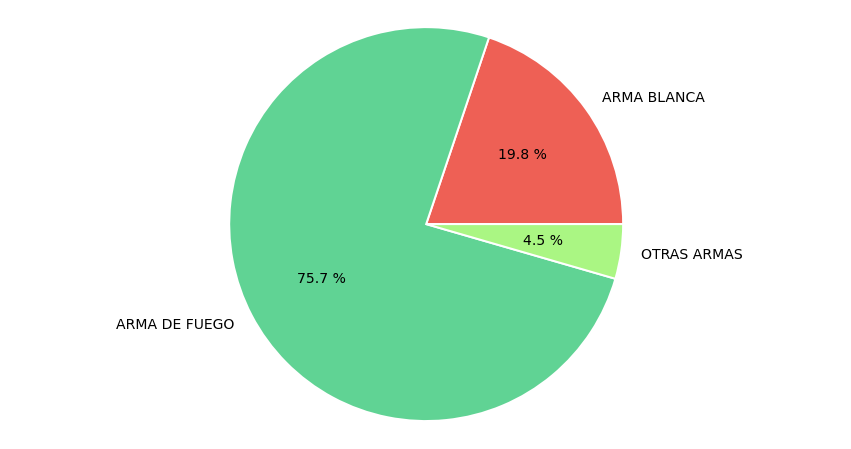

In [34]:
# Plot homicides by type of weapon 
arm_homicidies = df.groupby("arma")['cantidad'].sum()
arm_homicidies = arm_homicidies.to_frame().reset_index()

colores = ["#EE6055","#60D394","#AAF683"]
desfase = (0.1, 0, 0)
plt.figure(figsize=(15, 8)) 
plt.pie(arm_homicidies['cantidad'], 
        labels=arm_homicidies['arma'],
        autopct="%0.1f %%",
        colors=colores,
        wedgeprops={'linewidth': 2.0, 'edgecolor': 'white'},
        textprops={'fontsize': 14})
plt.axis("equal")
plt.show()

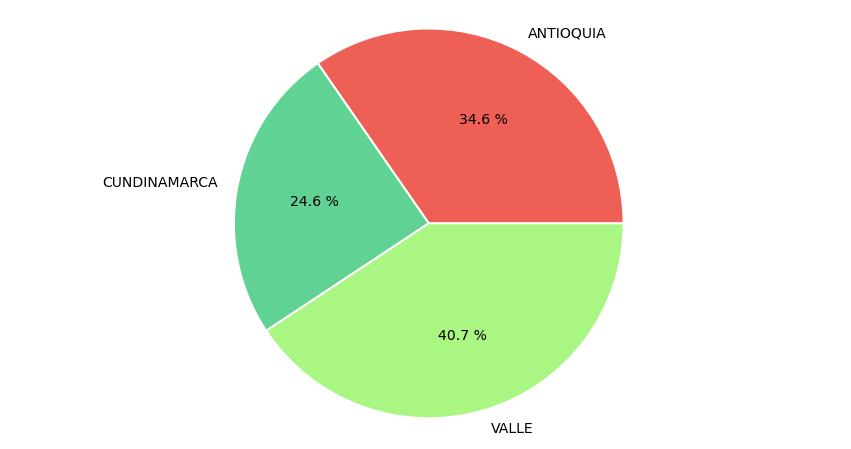

In [35]:
# Plot homicides by department
dep_homicidies = df.groupby("departamento")['cantidad'].sum()
dep_homicidies = dep_homicidies.to_frame().reset_index()

colores = ["#EE6055","#60D394","#AAF683"]
desfase = (0.1, 0, 0)
plt.figure(figsize=(15, 8)) 
plt.pie(dep_homicidies['cantidad'], 
        labels=dep_homicidies['departamento'],
        autopct="%0.1f %%",
        colors=colores,
        wedgeprops={'linewidth': 2.0, 'edgecolor': 'white'},
        textprops={'fontsize': 14})
plt.axis("equal")
plt.show()

(array([0, 1, 2]),
 [Text(0, 0, 'ANTIOQUIA'), Text(1, 0, 'CUNDINAMARCA'), Text(2, 0, 'VALLE')])

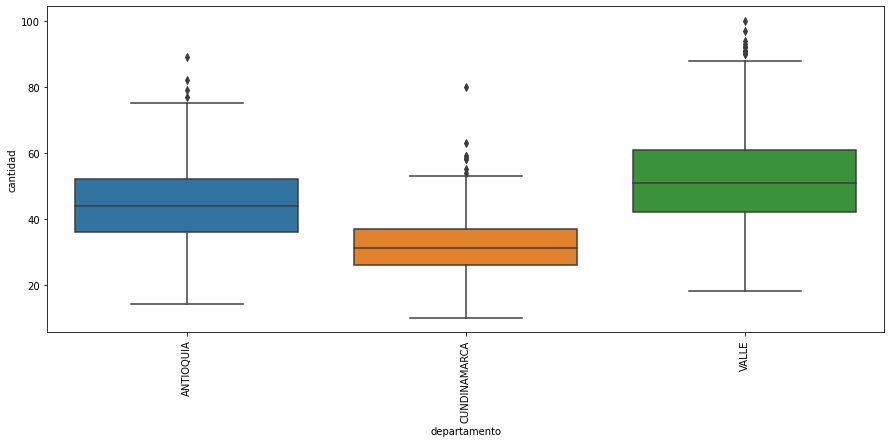

In [36]:
# Plot homicides by department weekly
df['week'] = df['fecha'].dt.to_period('W')
weekly_homicidies= df.groupby(["departamento","week"])['cantidad'].sum()
weekly_homicidies = weekly_homicidies.to_frame().reset_index()

fig, ax = plt.subplots(figsize=(15,6))
sns.boxplot(x="departamento", y="cantidad", data=weekly_homicidies, ax=ax)
plt.xticks(rotation=90)

(array([0, 1, 2]),
 [Text(0, 0, 'ANTIOQUIA'), Text(1, 0, 'CUNDINAMARCA'), Text(2, 0, 'VALLE')])

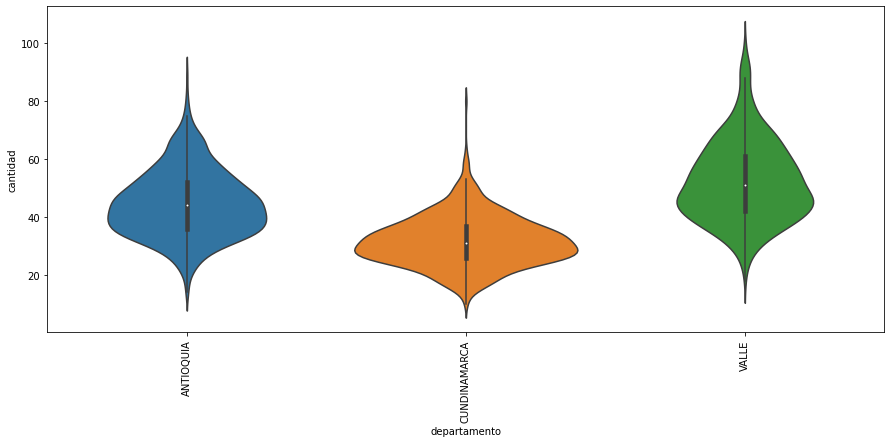

In [37]:
# Plot homicides by department weekly, violin plot
fig, ax = plt.subplots(figsize=(15,6))
sns.violinplot(x="departamento", y="cantidad", data=weekly_homicidies, ax=ax)
plt.xticks(rotation=90)

c:\Users\mjsoto\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 13.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


(array([0, 1, 2]),
 [Text(0, 0, 'ANTIOQUIA'), Text(1, 0, 'CUNDINAMARCA'), Text(2, 0, 'VALLE')])

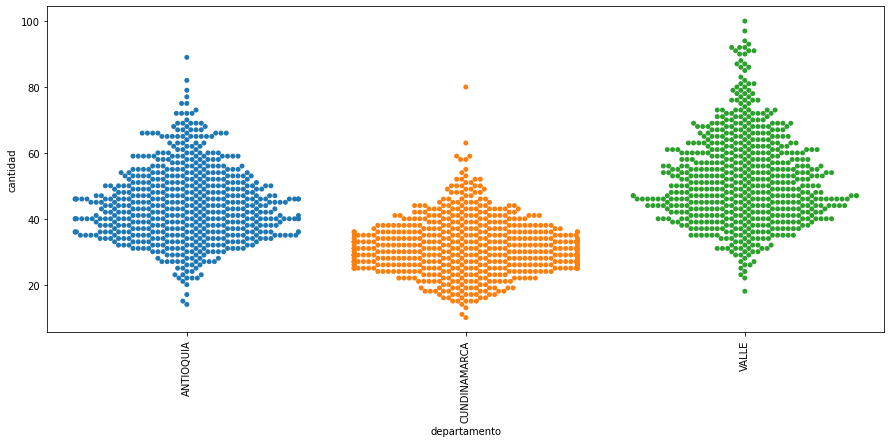

In [38]:
# Plot homicides by department weekly, swarm plot
fig, ax = plt.subplots(figsize=(15,6))
sns.swarmplot(x="departamento", y="cantidad", data=weekly_homicidies, ax=ax)
plt.xticks(rotation=90)

(array([0, 1, 2]),
 [Text(0, 0, 'ANTIOQUIA'), Text(1, 0, 'CUNDINAMARCA'), Text(2, 0, 'VALLE')])

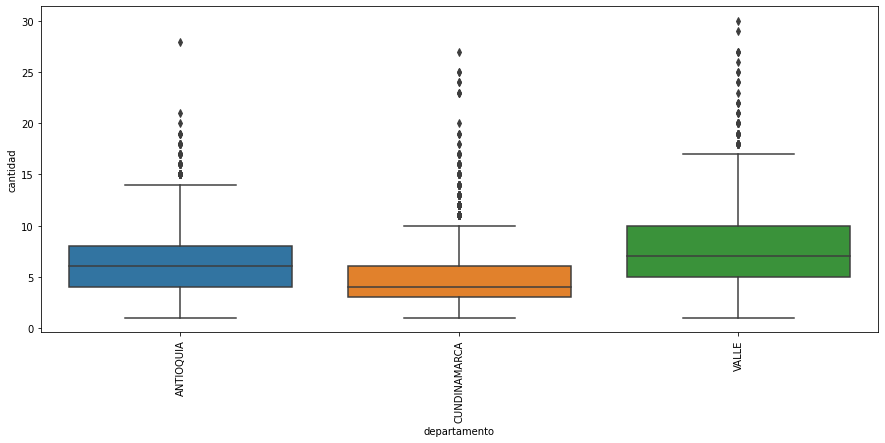

In [39]:
# Plot homicides by department daily
df['week'] = df['fecha'].dt.to_period('D')
weekly_homicidies= df.groupby(["departamento","week"])['cantidad'].sum()
weekly_homicidies = weekly_homicidies.to_frame().reset_index()

fig, ax = plt.subplots(figsize=(15,6))
sns.boxplot(x="departamento", y="cantidad", data=weekly_homicidies, ax=ax)
plt.xticks(rotation=90)

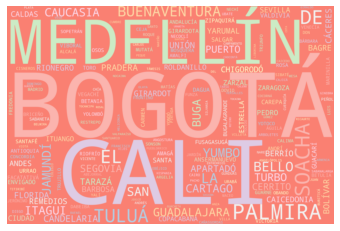

In [42]:
# Replace text in municipalities names to plot in a wordcloud
text = ' '.join(df['municipio'])
text = text.replace(" (CT)","")
text = text.replace("D.C.","")

# Generate word cloud
word_cloud = WordCloud(
    width=3000,
    height=2000,
    random_state=1,
    background_color="salmon",
    colormap="Pastel1",
    collocations=False,
    stopwords=STOPWORDS,
    ).generate(str(text))

plt.imshow(word_cloud,interpolation='bilinear')
plt.axis("off")
plt.show()

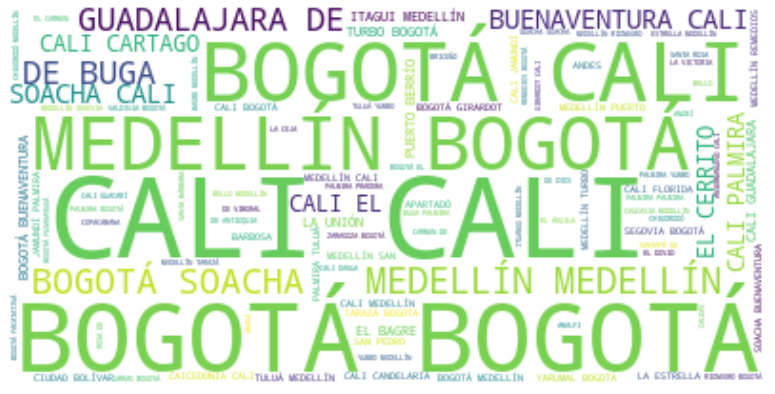

In [44]:
wc = WordCloud(background_color="white",
               stopwords=STOPWORDS, contour_width=3, contour_color='green')

wc.generate(str(text))

plt.figure(figsize=[15,7])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()